In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as sc
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
def custom_summary(df):
    from collections import OrderedDict
    result = []
    for col in list(df.columns):
        stats = OrderedDict({'col_name':col,
                            'count':df[col].count(),
                            'datatype': df[col].dtype,
                            'min': df[col].min(),
                            'Q1': df[col].quantile(0.25),
                            'mean':df[col].mean(),
                            'median':df[col].quantile(0.50),
                            'Q3':df[col].quantile(0.75),
                            'max':df[col].max(),
                            'variance':df[col].var(),
                            'stdev':df[col].std(),
                            'skewness':df[col].skew(),
                            'kurtosis':df[col].kurt(),
                            'range':df[col].max() - df[col].min(),
                            'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)})
        result.append(stats)
    resultdf = pd.DataFrame(data = result)
    return resultdf

In [5]:
df = df.drop(columns = ['sex','smoker','region','children'],axis = 1)

In [6]:
df.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [7]:
custom_summary(df)

,col_name,count,datatype,min,Q1,mean,median,Q3,max,variance,stdev,skewness,kurtosis,range,IQR
0,age,1338,int64,18.0000,27.00000,39.207025,39.000,51.000000,64.00000,1.974014e+02,14.049960,0.055673,-1.245088,46.00000,24.000000
1,bmi,1338,float64,15.9600,26.29625,30.663397,30.400,34.693750,53.13000,3.718788e+01,6.098187,0.284047,-0.050732,37.17000,8.397500
2,charges,1338,float64,1121.8739,4740.28715,13270.422265,9382.033,16639.912515,63770.42801,1.466524e+08,12110.011237,1.515880,1.606299,62648.55411,11899.625365


In [8]:
def custom_summary(df):
    from collections import OrderedDict
    result = []
    for col in list(df.columns):
        stats = OrderedDict({'col_name':col,
                            'count':df[col].count(),
                            'datatype': df[col].dtype,
                            'min': df[col].min(),
                            'Q1': df[col].quantile(0.25),
                            'mean':df[col].mean(),
                            'median':df[col].quantile(0.50),
                            'Q3':df[col].quantile(0.75),
                            'max':df[col].max(),
                            'variance':df[col].var(),
                            'stdev':df[col].std(),
                            'skewness':df[col].skew(),
                            'kurtosis':df[col].kurt(),
                            'range':df[col].max() - df[col].min(),
                            'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)})
        result.append(stats)
#comment for skewness
        if df[col].skew() <= -1:
            label = "Highly negative skewed"
        elif -1 <= df[col] .skew() <0.5:
            label = "Moderately negative skewed"
        elif -0.5 <= df[col].skew() <0:
            label = "Fairly symmetric (negative)"
        elif 0 <= df[col].skew() <0.5:
            label = "Fairly symmetric (positive)"
        elif 0.5 <= df[col].skew() <1:
            label = "Moderately positive skewed"
        elif df[col].skew() >1:
            label = "Highly positive skewed"
        else:
            label = "Error"
            
        stats['skewness comment'] = label
    resultdf = pd.DataFrame(data = result)
    return resultdf

In [9]:
custom_summary(df)

,col_name,count,datatype,min,Q1,mean,median,Q3,max,variance,stdev,skewness,kurtosis,range,IQR,skewness comment
0,age,1338,int64,18.0000,27.00000,39.207025,39.000,51.000000,64.00000,1.974014e+02,14.049960,0.055673,-1.245088,46.00000,24.000000,Moderately negative skewed
1,bmi,1338,float64,15.9600,26.29625,30.663397,30.400,34.693750,53.13000,3.718788e+01,6.098187,0.284047,-0.050732,37.17000,8.397500,Moderately negative skewed
2,charges,1338,float64,1121.8739,4740.28715,13270.422265,9382.033,16639.912515,63770.42801,1.466524e+08,12110.011237,1.515880,1.606299,62648.55411,11899.625365,Highly positive skewed


In [10]:
def custom_summary(df):
    from collections import OrderedDict
    result = []
    for col in list(df.columns):
        stats = OrderedDict({'col_name':col,
                            'count':df[col].count(),
                            'datatype': df[col].dtype,
                            'min': df[col].min(),
                            'Q1': df[col].quantile(0.25),
                            'mean':df[col].mean(),
                            'median':df[col].quantile(0.50),
                            'Q3':df[col].quantile(0.75),
                            'max':df[col].max(),
                            'variance':df[col].var(),
                            'stdev':df[col].std(),
                            'skewness':df[col].skew(),
                            'kurtosis':df[col].kurt(),
                            'range':df[col].max() - df[col].min(),
                            'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)})
        result.append(stats)
#comment for skewness
        if df[col].skew() <= -1:
            label = "Highly negative skewed"
        elif -1 <= df[col] .skew() <0.5:
            label = "Moderately negative skewed"
        elif -0.5 <= df[col].skew() <0:
            label = "Fairly symmetric (negative)"
        elif 0 <= df[col].skew() <0.5:
            label = "Fairly symmetric (positive)"
        elif 0.5 <= df[col].skew() <1:
            label = "Moderately positive skewed"
        elif df[col].skew() >1:
            label = "Highly positive skewed"
        else:
            label = "Error"
            
        stats['skewness comment'] = label

        
# comments for outliers
        upperlimit = stats['Q3'] + (1.5 * stats['IQR'])
        lowerlimit = stats['Q1'] - (1.5 * stats['IQR'])
        if len([x for x in df[col] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Has Outliers"
        else:
            outlier_label = "No outlier"
            
        stats['outliers comment'] = outlier_label
    resultdf = pd.DataFrame(data = result)
    return resultdf

In [11]:
custom_summary(df)

,col_name,count,datatype,min,Q1,mean,median,Q3,max,variance,stdev,skewness,kurtosis,range,IQR,skewness comment,outliers comment
0,age,1338,int64,18.0000,27.00000,39.207025,39.000,51.000000,64.00000,1.974014e+02,14.049960,0.055673,-1.245088,46.00000,24.000000,Moderately negative skewed,No outlier
1,bmi,1338,float64,15.9600,26.29625,30.663397,30.400,34.693750,53.13000,3.718788e+01,6.098187,0.284047,-0.050732,37.17000,8.397500,Moderately negative skewed,Has Outliers
2,charges,1338,float64,1121.8739,4740.28715,13270.422265,9382.033,16639.912515,63770.42801,1.466524e+08,12110.011237,1.515880,1.606299,62648.55411,11899.625365,Highly positive skewed,Has Outliers


In [12]:
#outlier treatment fn
def outlier_treatment_function(data, col, method = 'Quartile', strategy = 'Median'):
    coldata = data[col]
    
    if method == 'Quartile':
        median = coldata.median()  #data[col]
        Q1 = coldata.quantile(0.25)
        Q3 = coldata.quantile(0.75)
        IQR = Q3-Q1
        Upperlimit = Q3 + (1.5*IQR)
        Lowerlimit = Q1 - (1.5*IQR)
    elif method == 'Std':
        colmean = coldata.mean()
        colstd = coldata.std()
        cutoff = colstd*2  #It covers the approx 95 % of data
        Upperlimit = colmean + cutoff
        Lowerlimit = colmean - cutoff
    else:
        print('Invalid method')
        
    if strategy == 'Mean':
        data.loc[(coldata < Lowerlimit) | (coldata > Upperlimit), col] = colmean
    elif strategy == 'Median':
        data.loc[(coldata < Lowerlimit) | (coldata > Upperlimit), col] = median
    return data

In [13]:
def odt_plots(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))
    #Boxplot with outliers
    kwargs = {'fontsize':10, 'color':'black'}  #keyword arguments
    sns.boxplot(df[col], ax = ax1, color = 'b')
    ax1.set_title('Boxplot for '+col, **kwargs) #** to pass inbuilt fns.
    ax1.set_xlabel('Values',**kwargs)
    ax1.set_ylabel('Boxplot distribution',**kwargs)
    
    #Histogram with outliers
    sns.distplot(df[col], ax = ax2, color = 'r',fit = sc.norm)
    ax2.set_title('Histogram for '+col, **kwargs) #** to pass inbuilt fns.
    ax2.set_xlabel('Values',**kwargs)
    ax2.set_ylabel('Histogram',**kwargs)
    
    #Histogram without outliers
    y = outlier_treatment_function(df, col)
    sns.distplot(y[col], ax = ax3, color = 'y')
    ax3.set_title('Histogram for '+col, **kwargs) #** to pass inbuilt fns.
    ax3.set_xlabel('Values',**kwargs)
    ax3.set_ylabel('Histogram',**kwargs)

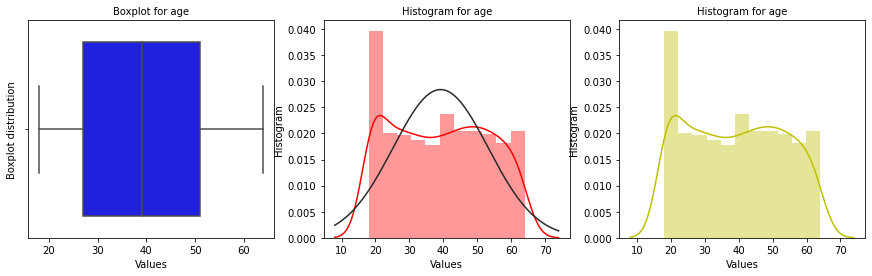

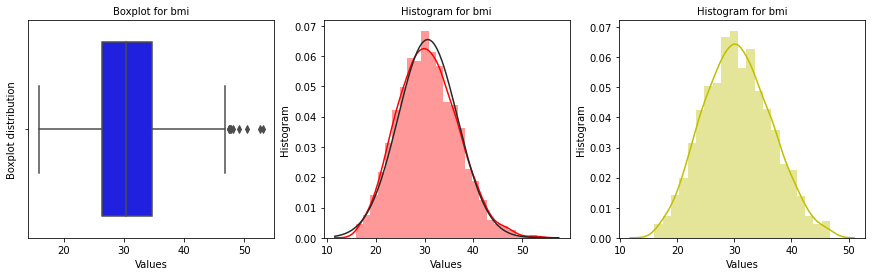

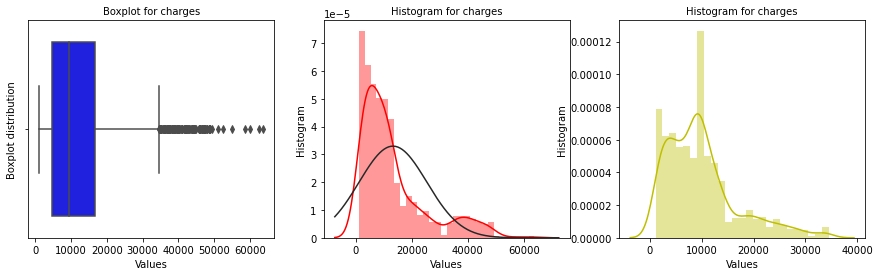

In [14]:
for col in df.columns:
    odt_plots(df,col)